In [3]:
import pandas as pd
import numpy as np
# import re
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("train.csv")
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1


In [5]:
df_test = pd.read_csv("test_x.csv")
df_test.head(2)

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0


In [6]:
df.stb.missing()

,missing,total,percent
Open,133,6554,2.029295
High,133,6554,2.029295
Low,133,6554,2.029295
Close,133,6554,2.029295
Adj Close,133,6554,2.029295
Volume,133,6554,2.029295
Date,0,6554,0.000000
Target,0,6554,0.000000


In [7]:
df.isnull().sum()*100/len(df)

Date         0.000000
Open         2.029295
High         2.029295
Low          2.029295
Close        2.029295
Adj Close    2.029295
Volume       2.029295
Target       0.000000
dtype: float64

In [8]:
df.dropna(inplace= True)

In [9]:
df.isnull().sum()*100/len(df)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Target       0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6421 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6421 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6421 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 451.5+ KB


In [11]:
df.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Target,6421,2,1,3388,0,3033
Volume,6421,3546,0.0,1649,278421700.0,1
Close,6421,6112,9866.200195,3,7488.200195,1
Low,6421,6141,8531.799805,3,11140.099609,1
High,6421,6157,8186.799805,3,10302.599609,1
Adj Close,6421,6176,3223.496826,3,10385.088867,1
Open,6421,6182,11939.5,3,10721.700195,1
Date,6421,6421,1994-01-03,1,1994-01-03,1


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6421.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.527644
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499274
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [13]:
df_test.describe()

,test_index,Open,High,Low,Close,Adj Close,Volume
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,7.260000e+02
mean,6919.500000,8399.936418,8458.035202,8332.158471,8396.085609,8396.085609,2.086387e+08
std,209.722436,899.325142,886.671165,916.904022,903.320144,903.320144,1.015796e+08
min,6557.000000,6223.700195,6362.500000,5814.500000,6107.200195,6107.200195,3.543620e+07
25%,6738.250000,7848.675049,7963.874878,7762.924805,7857.675171,7857.675171,1.472686e+08
50%,6919.500000,8673.950195,8725.250000,8609.750000,8672.399902,8672.399902,1.827458e+08
75%,7100.750000,9077.599609,9124.224854,9001.125244,9077.375244,9077.375244,2.340954e+08
max,7282.000000,10048.700195,10100.200195,10020.700195,10083.599609,10083.599609,9.752120e+08


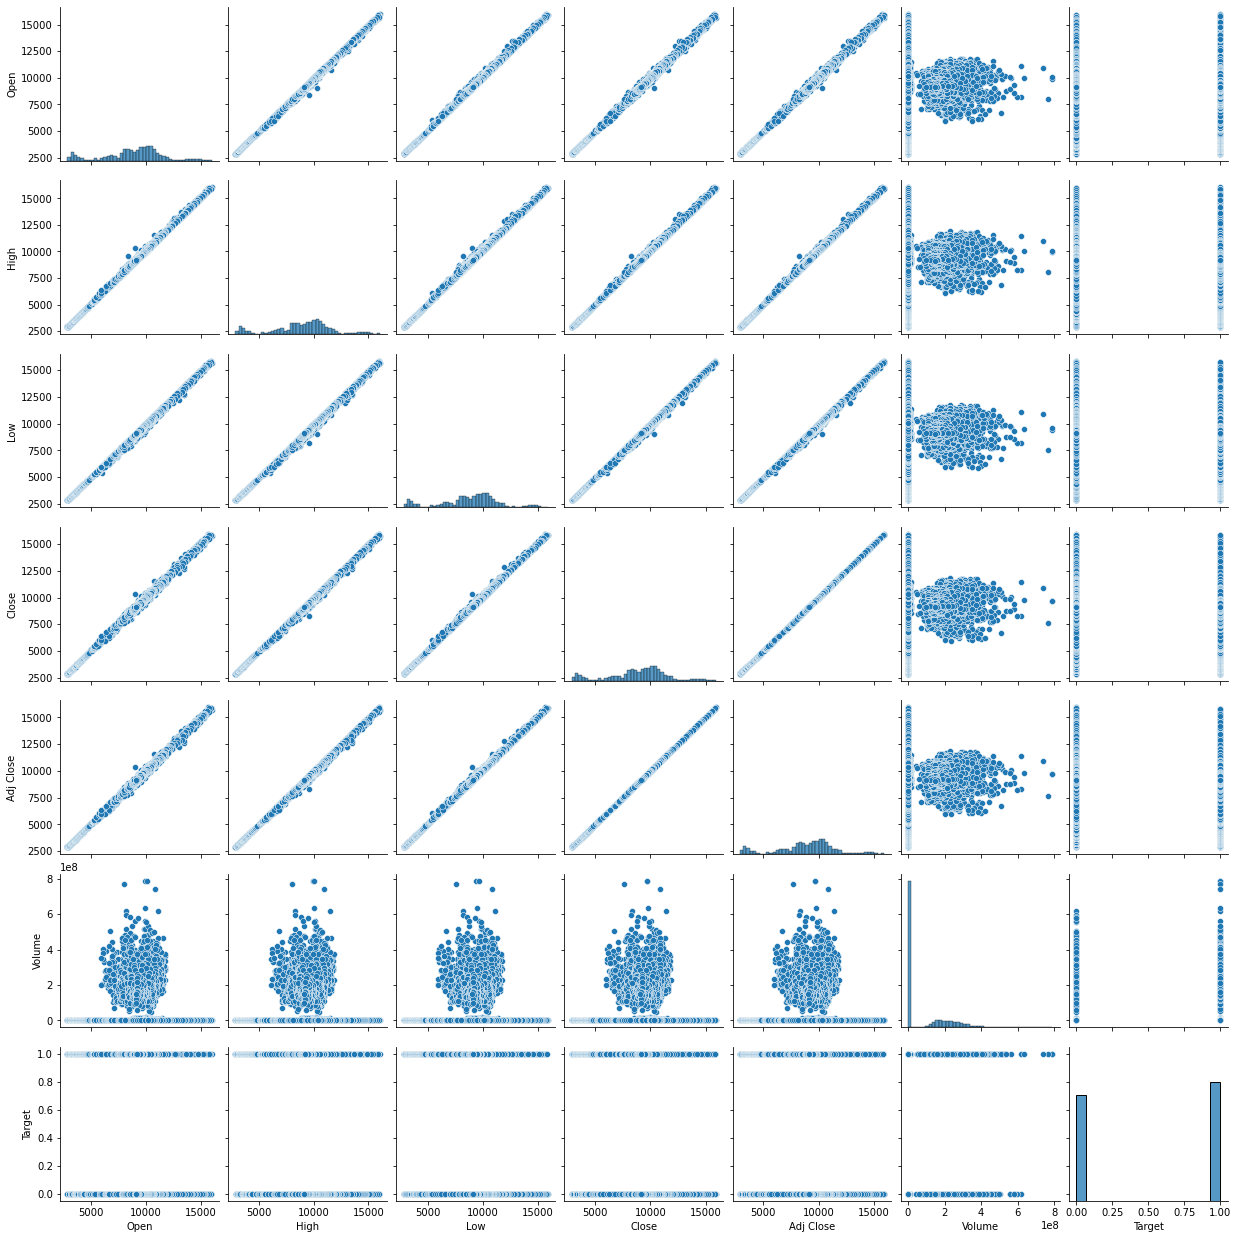

In [14]:
sns.pairplot(df)

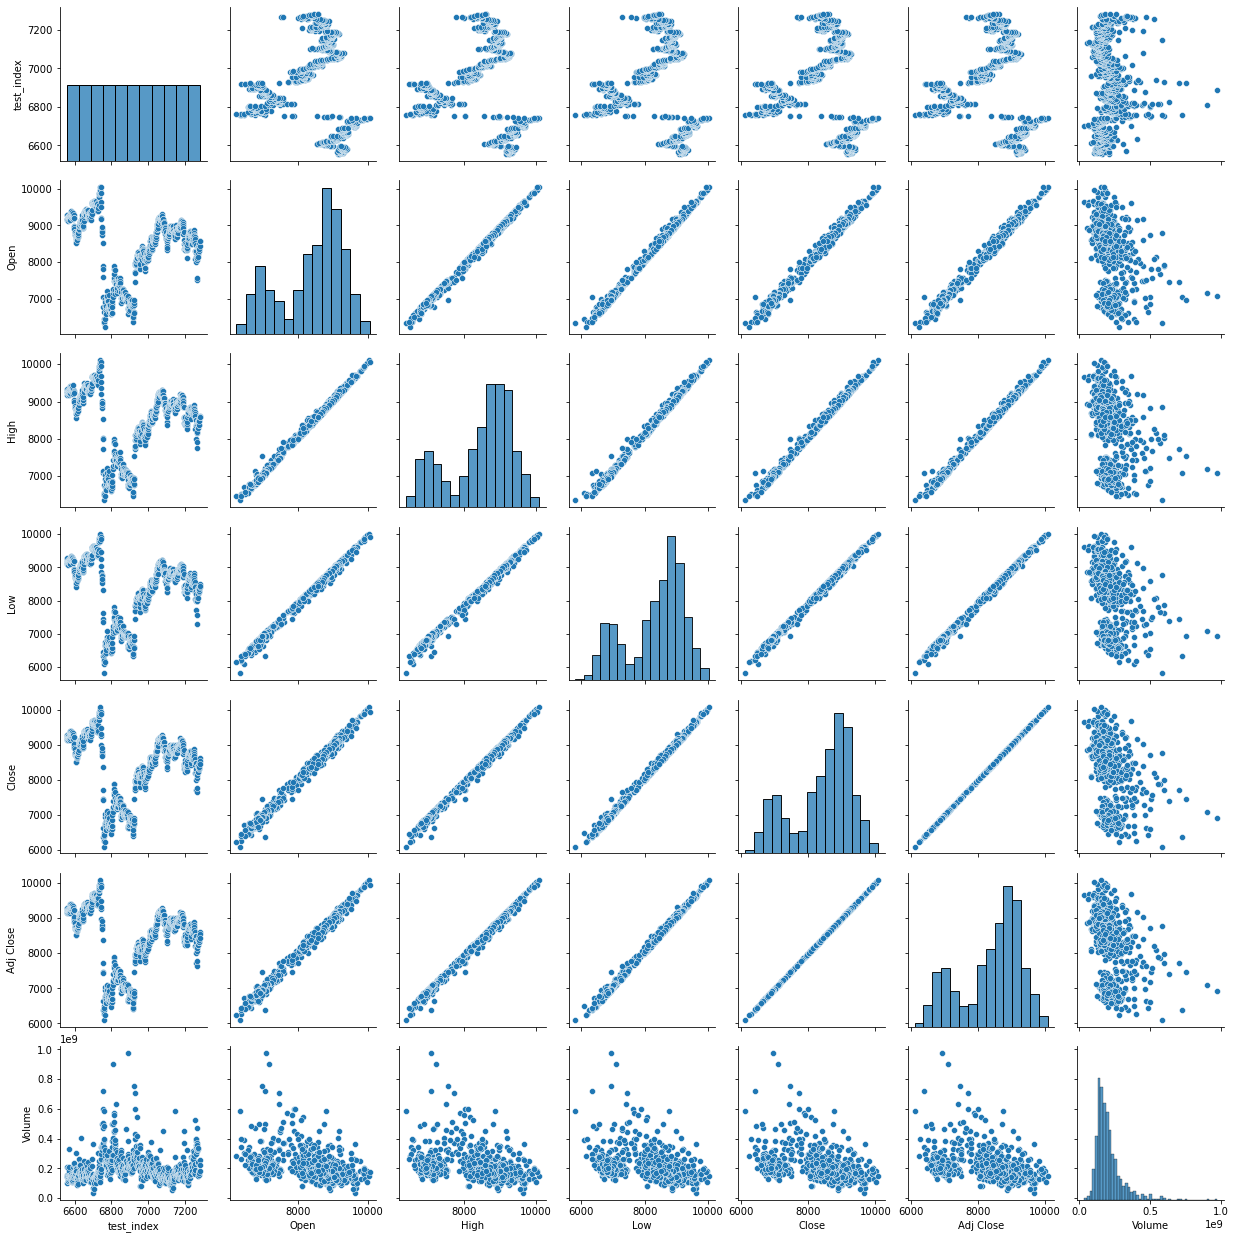

In [15]:
sns.pairplot(df_test)

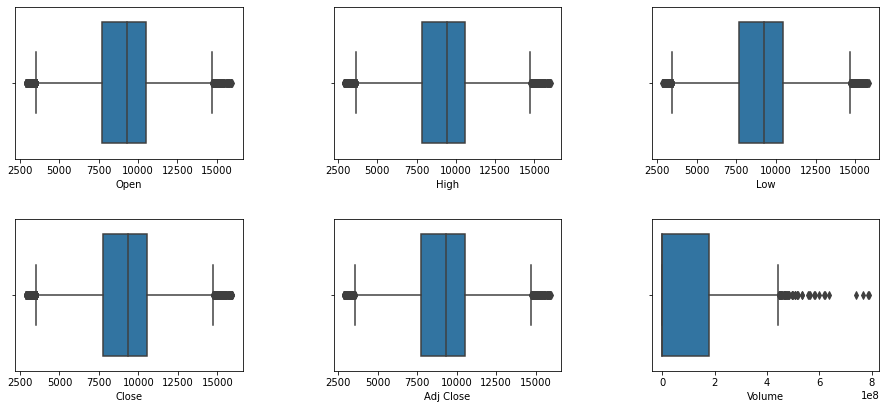

In [16]:
data_plot=df.drop(['Date', "Target"],axis=1)
plt.figure(figsize=(15,10))
for idx, value in enumerate(data_plot.columns):
    plt.subplot(3,3,idx+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.boxplot(data_plot[value])

In [17]:
def detectar_outliers(lista_columnas, df): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro df para indentificar los outliers
        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro df tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices 

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Target'],
      dtype='object')

In [19]:
lista_columnas = list(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

ind = detectar_outliers(lista_columnas, df)
# vemos que es lo que nos ha devuelto la función
for key, values in ind.items():
    print('Para la variable ' + key  + ' tenemos ' + str(len(values)) +' valores outliers,  esto es un ' + str(round(len(values)/df.shape[0]*100)) + '%\ de los datos' )

Para la variable Open tenemos 554 valores outliers,  esto es un 9%\ de los datos
Para la variable High tenemos 596 valores outliers,  esto es un 9%\ de los datos
Para la variable Low tenemos 486 valores outliers,  esto es un 8%\ de los datos
Para la variable Close tenemos 549 valores outliers,  esto es un 9%\ de los datos
Para la variable Adj Close tenemos 549 valores outliers,  esto es un 9%\ de los datos
Para la variable Volume tenemos 58 valores outliers,  esto es un 1%\ de los datos


# Correlación

<AxesSubplot:>

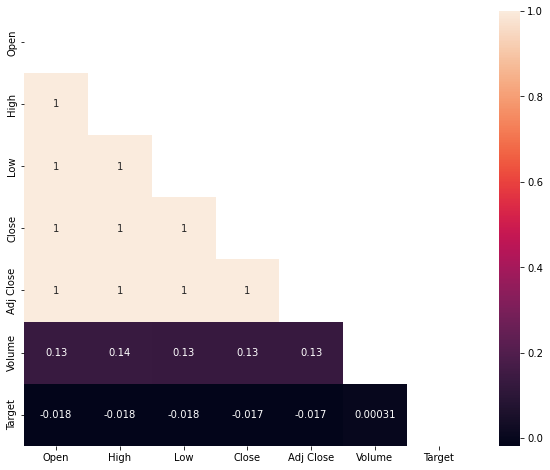

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

# Realizando el ajuste

In [21]:
df_test.head(2)

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0


In [22]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1


In [23]:
x =df.drop(columns = ['Date'])
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Hacemos la regresión lineal
LR = LinearRegression() # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Las diferentes métricas para nuestro modelo:
print('Para el conjunto train:---------------')
print('El valor de r2 es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 ajustado es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 es ',r2_score(y_test,y_prediction))
print('El valor de r2 ajustado es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 es  1.0
El valor de r2 ajustado es  1.0
El MAE es 1.5986548651212418e-13
EL RMSE es  2.362256170953873e-13
Para el conjunto test:---------------
El valor de r2 es  1.0
El valor de r2 ajustado es  1.0
El MAE es 1.6085619791921683e-13
EL RMSE es  2.7965028303689873e-13


In [24]:
# Ajustamos a un modelo de regresion logística en los datos de entrenamiento
from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_blobs
# from sklearn.metrics import accuracy_score

# Creando los inputs y los outputs
X =df.drop(columns = ['Date'])
y = df['Target']

# definiendo el modelo
model = LogisticRegression(solver='lbfgs')

# ajustando el modelo
model.fit(X, y)

# haciendo predicciones
yhat = model.predict(X)

# evaluando predicciones
acc = accuracy_score(y, yhat)
print(acc)

0.5276436692104034


In [25]:
df_test.columns

Index(['test_index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [26]:
df_test_copia = df_test.copy()

In [27]:
df_test_copia.drop(columns="Date", inplace = True)

In [28]:
df_test_copia.iloc[2,0:]

test_index    6.559000e+03
Open          9.186700e+03
High          9.261400e+03
Low           9.185700e+03
Close         9.236100e+03
Adj Close     9.236100e+03
Volume        1.506647e+08
Name: 2, dtype: float64

In [29]:
# define input
new_input = [df_test_copia.iloc[2,0:]]
# get prediction for new input
new_output = model.predict(new_input)
# summarize input and output
print(new_input, new_output)

[test_index    6.559000e+03
Open          9.186700e+03
High          9.261400e+03
Low           9.185700e+03
Close         9.236100e+03
Adj Close     9.236100e+03
Volume        1.506647e+08
Name: 2, dtype: float64] [1]


Probando con más modelos diferentes

In [30]:
x =df.drop(columns = ['Date'])
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.531543 (0.000507)
LDA: 0.528820 (0.007185)
KNN: 0.526091 (0.020052)
CART: 1.000000 (0.000000)
NB: 0.522974 (0.012017)
SVM: 0.531737 (0.001264)


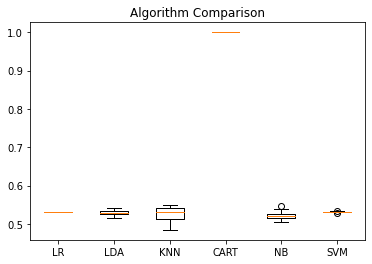

In [31]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Aquí tenemos los diferentes modelos y su accuracy

Ahora tenemos que hacer predicciones del modelo. En general todos los modelos tienen similar accuracy. Elijo el modelo LR. 

In [32]:
# Hacemos predicciones en el x test
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [33]:
# evaluamos las predicciones
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.51284046692607
[[  1 626]
 [  0 658]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       627
           1       0.51      1.00      0.68       658

    accuracy                           0.51      1285
   macro avg       0.76      0.50      0.34      1285
weighted avg       0.75      0.51      0.35      1285



Aquí vemos la precisión de todo nuestro dataset es de 0.51284046692607

La matriz nos indica los errores cometidos

En la tabla, vemos la precisión, exactitud, el f1 de nuestros datos